# Horn Radio Telescope Spectra Calibration Example

### Glen Langston, 2022 February 7

This notebook shows examples of using previously averaged hot and cold load observations to study a single days observations. 

The calibration requireds an observation of the sky, which is assumed to be very cold, 10 Kelvins (about -442 Fahrenheit), along with several observations of the ground, to calibrate the measured intensity of hydrogen in the arms of our Milky Way.

In [1]:
# find out your current directory
!pwd
# now add one directory up to find packages 
import sys
sys.path.append("../")

/Users/glangsto/Desktop/Research/jupyter/calibrate


In [2]:
# Import the Radio Astronomy Service (RAS) code.
import ephem
import ras
import rasnames

In [3]:
# configure the plot to 
# -R flag known radio interference
# -C flag (interpolate over) the center channal
# -I 600.  Average the different observations for 600 seconds
# "data" look in the 'data' directory for the observations
p = ras.Plot()
p.help("-R -C -I 600.")



Flagging RFI
Spectral integration time for averaging:    600.0 s


In [4]:
# get a list of all files in the data directory.  The data are up a directory 

# "data" look in the 'data' directory for the observations
datadir = "../data/"
files, count = rasnames.splitNames(datadir, ".ast", ".hot", doDebug=False)
print("Found %d files: %s to %s " % ( count, files[0], files[count-1]))
#names = p.help("-R -C -V -I 3600. "+datadir)
# show the list of fine names found

Found 44 files: ../data/20-11-28T180022.hot to ../data/20-11-28T195828.ast 


Ploting Intensity versus Frequency
Date: 2020-11-28
  Time   AZ,EL (deg)  Lon,Lat (deg)    Max   Median    Count  
18:10:51 180.0,-40.0  301.3,-27.5    1.863    1.621   1800000
18:23:58 180.0,-40.0  301.2,-27.4    1.891    1.643   1800000
18:37:04 180.0,-40.0  301.2,-27.4    1.952    1.693   1800000
18:50:11 180.0,-40.0  301.2,-27.3    1.977    1.714   1800000
19:06:02 180.0,-40.0  301.1,-27.2    1.968    1.707   1080000
19:19:09 180.0, 60.0   37.5,  9.6    0.846    0.707   2160000
19:32:15 180.0, 60.0   38.9,  6.7    0.841    0.706   2160000
19:45:22 180.0, 60.0   40.4,  3.8    0.827    0.701   2160000
19:58:28 180.0, 60.0   41.9,  0.9    0.810    0.697   2160000


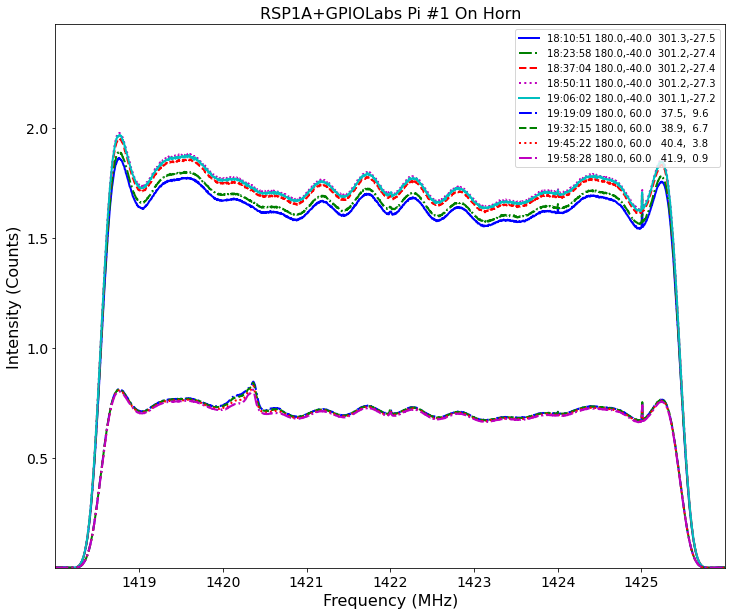

In [5]:
# first just plot a few spectra
# Hot observations are above the Cold observations
p.raw(files)

In [14]:
p3 = ras.Plot()
p3.help("-R -C -I 3600. -V -K keep ")

# show the list of fine nams found

Flagging RFI
Spectral integration time for averaging:   3600.0 s
Keeping averages in directory: keep/


Found  23 Hot load observations
Ave Hot: 2048: 1.668835
Wrote Average Hot  Load File: keep/T0-20-11-28T182912.hot
No high Galactic Latitude data
Ave Cold: 2048: 0.702811
Wrote Average Cold Load File: keep/T0-20-11-28T190602.ast
Min, Max El:   60.0,  60.0 deg; Min, Max Glat:   0.25,  11.39 deg
Found 9 Cold Sky Obs.; Min El =    60.0, Low Gal Lat:     6.4
Median Receiver Temp:  195.73 +/-  1.75 ( 3.08  0.42) (K)
Ploting Intensity versus Velocity
Date: 2020-11-28
  Time   AZ,EL (deg)  Lon,Lat (deg)  Max-(K)-Median   X (km/s)  Count 
19:06:02 180.0,-40.0  301.2,-27.4   490.73   490.73   219.437  8280000
19:58:28 180.0, 60.0   39.7,  5.3   240.89   205.22    -5.668  7560000


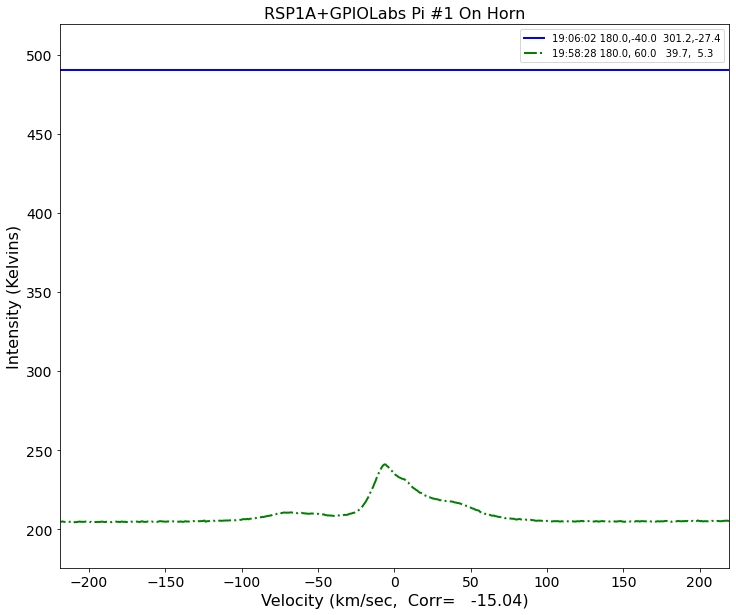

In [15]:
p3.tsys(files)

In [17]:
# get the hot and cold files just created and "kept" in directory
keepdir = "keep"
hotfiles, count = rasnames.splitNames(keepdir, ".hot", "", doDebug=False)
coldfiles, count = rasnames.splitNames(keepdir, ".ast", "", doDebug=False)
# calibrate all the data with these files
p4 = ras.Plot()
controlstr = "-R -C -I 600. -V -A %s %s" % (hotfiles[0], coldfiles[0])
print(controlstr)
p4.help(controlstr)
print("Hot average: %s;  Cold average: %s" % (p4.hotfilename, p4.coldfilename))

-R -C -I 600. -V -A keep/T0-20-11-28T182912.hot keep/T0-20-11-28T190602.ast
Flagging RFI
Spectral integration time for averaging:    600.0 s
Calibrating with keep/T0-20-11-28T182912.hot and keep/T0-20-11-28T190602.ast
Hot average: keep/T0-20-11-28T182912.hot;  Cold average: keep/T0-20-11-28T190602.ast


In [18]:
# now look in the list of directories and return the full file names
# This program only lookes for file types given.  The program could be used for any purpuse
# radio astronomy or any other type of input search.
datafiles, count = rasnames.splitNames(datadir, ".ast", "", doDebug=False)
print("Calibrating %s to %s" % (datafiles[0], datafiles[count-1]))
# check setting of hot and cold load file names:
print("Hot average: %s;  Cold average: %s" % (p4.hotfilename, p4.coldfilename))


Calibrating ../data/20-11-28T190602.ast to ../data/20-11-28T195828.ast
Hot average: keep/T0-20-11-28T182912.hot;  Cold average: keep/T0-20-11-28T190602.ast


Hot File keep/T0-20-11-28T182912.hot, Read 2048 channels
Cold File keep/T0-20-11-28T190602.ast, Read 2048 channels
Found 1 Cold Sky Obs.; Min El =    60.0, Low Gal Lat:    40.0
Median Receiver Temp:  195.73 +/-  1.75 ( 3.08  0.42) (K)
Ploting Intensity versus Velocity
Date: 2020-11-28
  Time   AZ,EL (deg)  Lon,Lat (deg)  Max-(K)-Median   X (km/s)  Count 
19:16:32 180.0, 60.0   37.2, 10.2   245.32   206.40    -3.990  1800000
19:29:38 180.0, 60.0   38.6,  7.3   244.35   206.30    -5.479  1800000
19:42:45 180.0, 60.0   40.1,  4.4   240.74   205.02    -6.920  1800000
19:55:51 180.0, 60.0   41.6,  1.5   236.08   203.74    -7.483  1800000
19:58:28 180.0, 60.0   42.5,  0.2   233.34   203.74    -6.640   360000


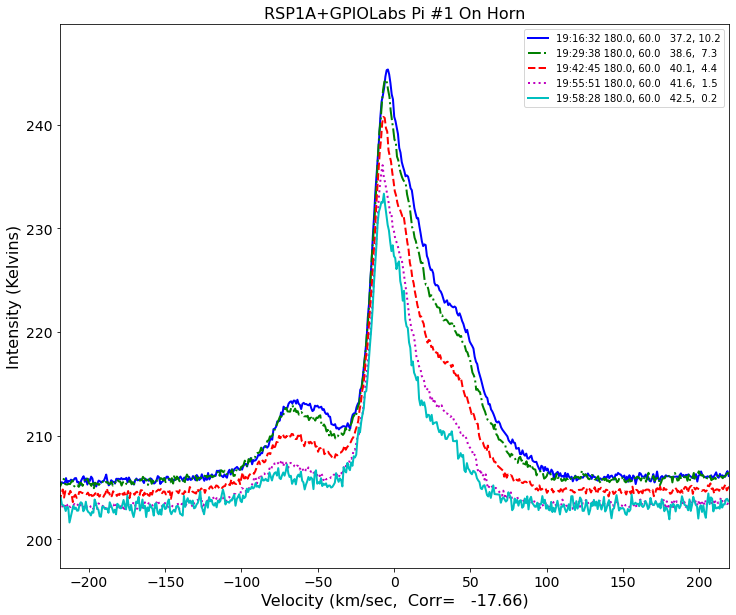

In [19]:
# Now perform actual calibration and plotting of each observation
p4.tsys(datafiles)

Fitting and subtracking a baseline
Hot File keep/T0-20-11-28T182912.hot, Read 2048 channels
Cold File keep/T0-20-11-28T190602.ast, Read 2048 channels
Found 1 Cold Sky Obs.; Min El =    60.0, Low Gal Lat:    40.0
Median Receiver Temp:  195.73 +/-  1.75 ( 3.08  0.42) (K)
Ploting Intensity versus Velocity
  Time   AZ,EL (deg)  Lon,Lat (deg)  Max-(K)-Median   X (km/s)  Count 
19:16:32 180.0, 60.0   37.2, 10.2    39.68     0.65    -3.990  1800000
19:29:38 180.0, 60.0   38.6,  7.3    39.24     0.96    -5.479  1800000
19:42:45 180.0, 60.0   40.1,  4.4    36.50     0.66    -6.920  1800000
19:55:51 180.0, 60.0   41.6,  1.5    32.99     0.47    -7.483  1800000
19:58:28 180.0, 60.0   42.5,  0.2    30.95     1.03    -6.640   360000


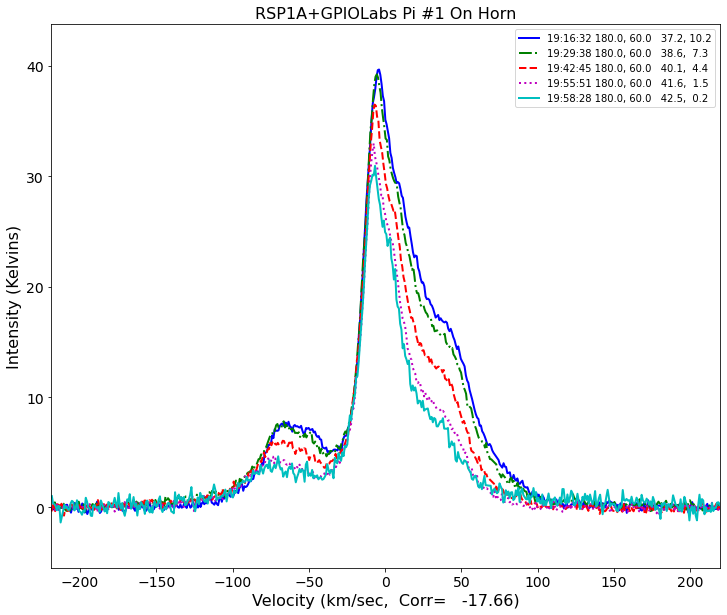

In [21]:
# tell the software to subtract a baseline
p4.help("-BASE")
# now re-plot
p4.tsys(datafiles)

# Congratulations!
## You've saved the Calibration spectra for an hour of observations.
## Then you've calibrated each 10 minute block of observations
### Did you notice how much the spectra change in just 10 minutes?